<a href="https://colab.research.google.com/github/glo-code/ecommerce-analysis/blob/main/ecommerce_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import datetime

In [79]:
df=pd.read_csv('Amazon Sale Report.csv',parse_dates=True,on_bad_lines='skip',low_memory=False)
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30861,30861,406-8960622-0081958,04-12-22,Shipped,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,...,INR,759.00,KOLKATA,WEST BENGAL,700034.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
30862,30862,171-6937948-3499552,04-12-22,Shipped,Amazon,Amazon.in,Expedited,J0008,J0008-SKD-M,Set,...,INR,1065.00,NEW DELHI,DELHI,110085.0,IN,NaN,True,NaN,NaN
30863,30863,406-0634942-2596333,04-12-22,Shipped,Amazon,Amazon.in,Expedited,SET098,SET098-KR-PP-S,Set,...,INR,696.00,BENGALURU,KARNATAKA,560032.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
30864,30864,406-5158965-8921161,04-12-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-M,Set,...,INR,1140.00,NEW DELHI,DELHI,110055.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN




```
Indagine sui clienti


```



Ordine ID e Status

In [80]:
data=pd.to_datetime(df['Date'])
df['months']=data.dt.month_name()
df['year']=data.dt.year
df['day']=data.dt.day


group=df.groupby(['day','months','year'])[['Order ID','Status']].value_counts().reset_index()
mask=np.where(group['count']<group['count'].max())[0]
print('Order less than max:',group['count'].iloc[mask].sum(),'in the day:',group.iloc[mask])
mask2=group['count'][group['count']==group['count'].max()]
'Order == max:',mask2.value_counts(),'in the day:',group.iloc[mask2.index]


Order less than max: 30856 in the day:        day months  year             Order ID                        Status  \
0       12  April  2022  406-2285407-4222733                       Shipped   
1       12  April  2022  404-2648970-9042715                       Shipped   
2       12  April  2022  404-2448060-6133124  Shipped - Delivered to Buyer   
3       12  April  2022  406-7886687-0751556  Shipped - Delivered to Buyer   
4       12  April  2022  407-8863009-7029160  Shipped - Returned to Seller   
...    ...    ...   ...                  ...                           ...   
28837   30  April  2022  171-8220241-5105927                       Shipped   
28838   30  April  2022  171-8169654-0282758                       Shipped   
28839   30  April  2022  171-8115772-7549114                       Shipped   
28840   30  April  2022  171-8061614-5688327                       Shipped   
28841   30  April  2022  S02-9107114-0460608                       Shipped   

       count  
0        

<ipython-input-80-c4cc771dfd87>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data=pd.to_datetime(df['Date'])


('Order == max:',
 count
 10    1
 Name: count, dtype: int64,
 'in the day:',
       day months  year             Order ID                        Status  \
 2455   14  April  2022  408-3317403-1729937  Shipped - Delivered to Buyer   
 
       count  
 2455     10  )

Notiamo che il massimo di ordini da parte di un cliente è di 12 mentre il minimo è 1.Il massimo di ordini si è verificato sia ad aprile che a maggio, soltanto che a maggio si è trattato non di ordini spediti ma cancellati dallo stesso cliente.
Abbiamo invece contro i 2 ordini più alti, 91354 ordini minimi da più clienti.


In [81]:
count=group.groupby('months')['Status'].value_counts().unstack()
count=count.fillna(0).astype(int)
count

Status,Cancelled,Shipped,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller
months,,,,,,,,,
April,4259,16324,7670,2,1,1,3,581,1


April


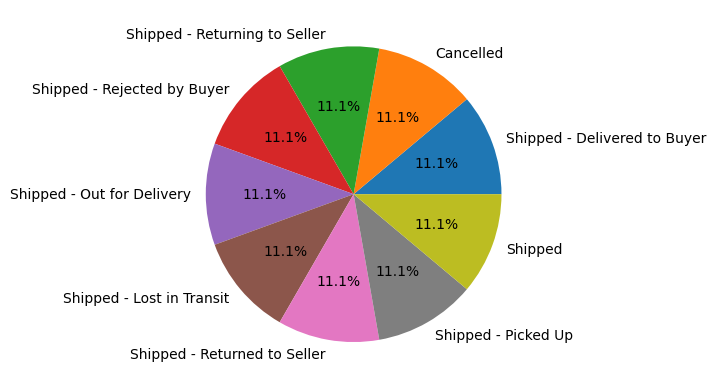

In [82]:
perc_precise=count/count.sum()*100
perc_precise.round(2).reset_index()


labels=set(df['Status'])

conteggio=0
for categorie in perc_precise:
    categorie=perc_precise.iloc[conteggio]
    print(categorie.name)
    ax,fig=plt.subplots()
    plt.pie(categorie,labels=labels,autopct='%1.1f%%')
    conteggio=conteggio+1
    if conteggio==len(perc_precise.index):
       break


Ordini per mese 0        0
1        0
2    30866
3        0
dtype: int64
Ordini totali 30866


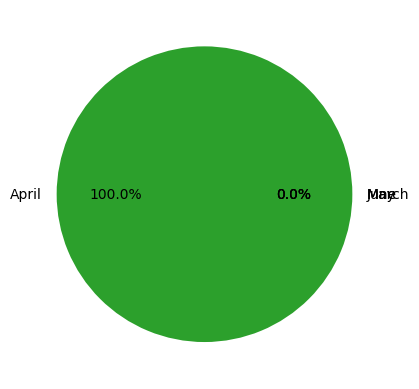

In [83]:
lista_mesi=['June','May','April','March']
ordini_totali=[]
for mese in lista_mesi:
    result=group['count'][group['months']==mese].sum()
    ordini_totali.append(result)

ordini_totali=pd.Series(ordini_totali)
print('Ordini per mese',ordini_totali)
print('Ordini totali',ordini_totali.sum())
perc=ordini_totali/ordini_totali.sum()*100
perc=perc.round(2)

ax,fig=plt.subplots()
plt.pie(perc,labels=lista_mesi,autopct='%1.1f%%')
plt.show()



Notiamo che ad Aprile abbiamo il maggior numero di ordini spediti (17.8%) e cancellati (15,5%). Abbiamo anche un modesto numero di ordini ritornati al venditore e in sospeso(16%). A giugno invece alto numero di ordini spediti ma anche cancellati anche se sono di meno rispetto ad aprile. Pochi però i resi e molti sospesi. A marzo nessun ordine sospeso e pochi cancellati ma ben il 44% degli ordini persi nel transito e 27% cancellati rispetto al 15,5% di aprile. E' il mese in cui si hanno avuti meno ordini. A maggio la maggior parte spediti e cancellati ed un numero moderato minore rispetto ad aprile di resi (21.6% rispetto al 16% di aprile). Pochi sospesi (18% rispetto ad aprile) e il 17% di persi nel transito e cancellati.

Quindi si è venduto di più tra aprile e maggio (47% e 40%) e modertamente a giugno (12%) e di meno a marzo (0.2%).



,Status,count
0,Shipped,56.10
1,Shipped - Delivered to Buyer,27.25
2,Cancelled,14.63
3,Shipped - Returned to Seller,1.99
4,Shipped - Rejected by Buyer,0.01
5,Shipped - Lost in Transit,0.01
6,Shipped - Out for Delivery,0.00
7,Shipped - Returning to Seller,0.00
8,Shipped - Picked Up,0.00


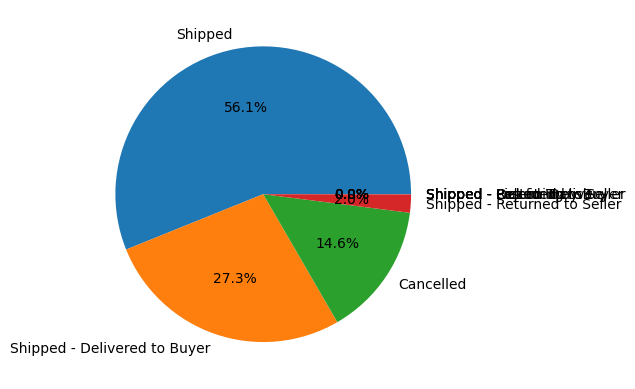

In [84]:
total=df['Status'].value_counts().sum()
status=df['Status'].value_counts().apply(lambda x:x/total*100).round(2).reset_index()
#status=status[status['count']!=0.0]
value=status['count']
fig,ax=plt.subplots()
labels=status['Status']
plt.pie(value,labels=labels,autopct='%1.1f%%')#,startangle=90,shadow=True,labeldistance=0.80,pctdistance=0.5)
status

Notiamo che la maggior parte degli ordini nei mesi indicati, sono stati spediti (circa il 58,8%) mentre il 25 % è stato spedito e consegnato al compratore. Il 14% invece è stato cancellato mentre soltanto 1.8% degli ordini è stato mandato indietro.
Soltanto per il 0,2% invece è stato effettuato il reso ma ancora l'ordine non è ritornato al venditore.



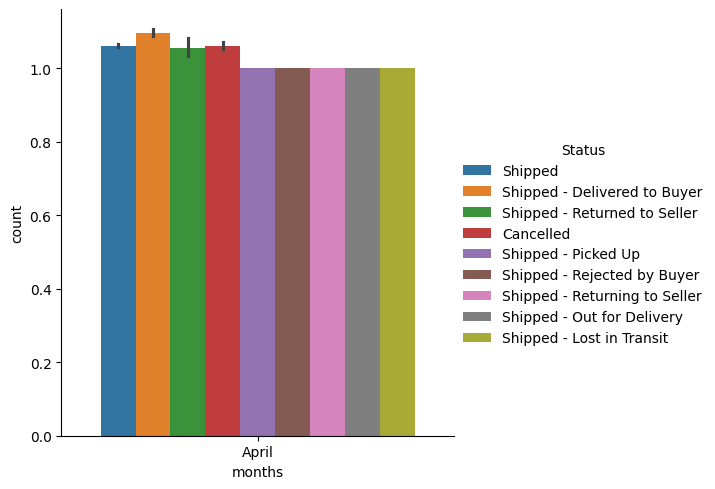

,day,months,year,Order ID,Status,count
0,12,April,2022,406-2285407-4222733,Shipped,3
1,12,April,2022,404-2648970-9042715,Shipped,3
2,12,April,2022,404-2448060-6133124,Shipped - Delivered to Buyer,3
3,12,April,2022,406-7886687-0751556,Shipped - Delivered to Buyer,3
4,12,April,2022,407-8863009-7029160,Shipped - Returned to Seller,3
...,...,...,...,...,...,...
28837,30,April,2022,171-8220241-5105927,Shipped,1
28838,30,April,2022,171-8169654-0282758,Shipped,1
28839,30,April,2022,171-8115772-7549114,Shipped,1
28840,30,April,2022,171-8061614-5688327,Shipped,1


In [85]:

sns.catplot(group,x=group['months'],y=group['count'],kind='bar',hue='Status')
plt.show()
group

Tipo di prodotto acquistato


In [86]:
clothes=df['Category'].value_counts().reset_index()
perc_vestiti=clothes['count']/clothes['count'].sum()*100
vestiti_mesi=df.groupby('Category')['months'].value_counts().unstack()
vestiti_mesi.fillna(0).astype(int)
clothes.sum()

Category    kurtaSetWestern DressTopBlouseEthnic DressBott...
count                                                   30866
dtype: object

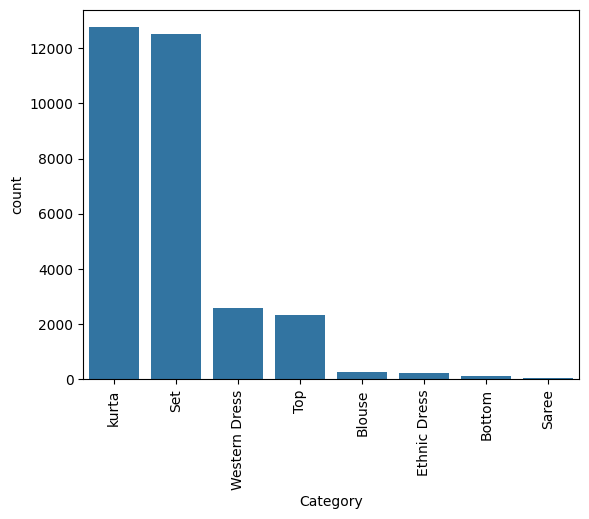

In [87]:
sns.barplot(clothes,x='Category',y='count')
plt.xticks(rotation=90)
plt.show()

Notiamo che i prodotti più acquistati in assoluto sono i set e la kurta e moderatamente il western dress e top. I prodotti meno acquistati sono ethnic dress, blouse, bottom e saree e ancora meno (soltanto 3 acquisti) il dupatta.
Dalle percentuali notiamo che il 39% acquista il set e il 38% il kurta mentre il 12% il western dress e soltanto l'8.2% il top.

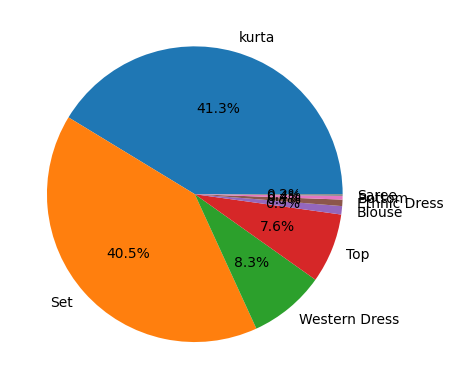

0    41.304348
1    40.533273
2     8.345753
3     7.616795
4     0.913627
5     0.703039
6     0.401737
7     0.181429
Name: count, dtype: float64

In [88]:
ax,fig=plt.subplots()
plt.pie(perc_vestiti,labels=clothes['Category'],autopct='%1.1f%%')
plt.show()
perc_vestiti

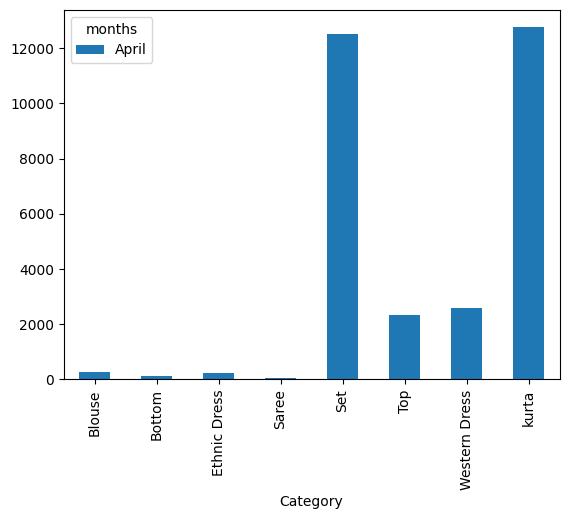

In [89]:
#ax,fig=plt.subplots()
vestiti_mesi.plot(kind='bar')
plt.show()

I set e i kurta sono stati più venduti nel mese di aprile, di più i set e i set anche nel mese di maggio sono stati più venduti rispetto ai kurta, che invece sono stati più venduti durante il mese di giugno. I top e i western dress invece hanno avuto poche vendite rispetto ai set e ai kurta ma i western dress nel mese di maggio e giugno sono stati più venduti rispetto ai top.

In [90]:

taglie=pd.crosstab(df['Category'],[df['Size']]).reset_index()
taglie.round(4)

Size,Category,3XL,4XL,5XL,6XL,Free,L,M,S,XL,XS,XXL
0,Blouse,0,0,0,0,101,31,44,41,30,9,26
1,Bottom,19,0,0,0,0,19,20,19,11,17,19
2,Ethnic Dress,30,0,0,0,0,37,38,34,33,15,30
3,Saree,0,0,0,0,56,0,0,0,0,0,0
4,Set,1320,0,0,0,0,1973,2419,2053,1849,1388,1509
5,Top,247,0,0,0,0,394,422,286,434,203,365
6,Western Dress,319,0,0,0,0,475,434,382,401,228,337
7,kurta,1531,7,20,19,0,2306,2225,1421,2350,936,1934


<Axes: xlabel='Size'>

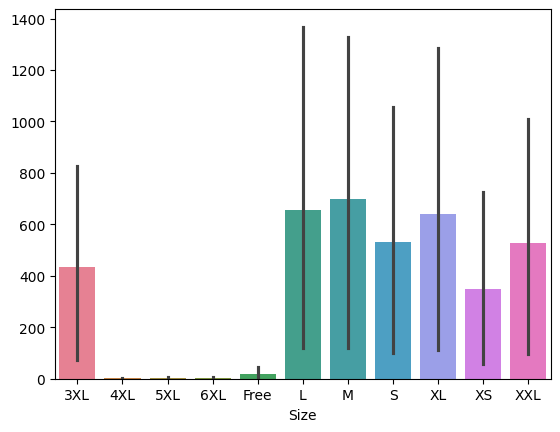

In [91]:
sns.barplot(taglie)

La taglia più venduta è la M/L mentre quella meno venduta è la XS e la 3XL. Mentre le taglie oltre la 3XL sono vendute ancora più raramente e anche la taglia Free.

Spesa


In [92]:
'Il prezzo massimo/minimo e medio sono:',df['Amount'].describe()[['max','min','mean']]
prezzo=df.groupby('months')['Amount'].mean().reset_index()
prezzo

,months,Amount
0,April,620.804767


In [93]:
c=df.groupby('Category')['Amount'].value_counts().unstack()
c.fillna(0).astype(int)

Amount,0.00,229.00,237.14,246.67,249.00,259.00,266.67,267.00,269.52,270.48,...,2130.00,2175.00,2198.00,2224.00,2230.00,2232.00,2299.00,2864.00,4235.72,5495.00
Category,,,,,,,,,,,,,,,,,,,,,
Blouse,5,0,0,0,5,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bottom,2,3,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Ethnic Dress,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Saree,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Set,253,0,0,0,0,0,0,0,0,0,...,1,0,1,3,1,0,1,1,1,1
Top,39,0,0,0,0,11,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
Western Dress,30,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
kurta,198,6,3,5,37,85,7,5,1,0,...,0,0,0,0,0,0,0,0,0,0


In media i clienti spendono 648,56 dollari per acquistare la merce in totale. Il prezzo medio ad Marzo è stato 627, a Aprile 626 per poi aumentare a Maggio 663 e scendere leggermente a Giugno 661. Quindi in teoria i prezzi sono saliti tra Maggio e Giugno.

Notiamo però che la maggior parte degli acquisti di alcuni articoli sono costati 0.00 e questa è una cosa strana. Anche se notiamo che tra i kurta ben 44 siano stati venduti a 249.00 mentre 14 bottom a 229.00 e 7 blouse a 249.00 ma il resto è minore.
Perchè la maggior parte degli articoli sono stati acquistati gratis?

In [94]:
promozioni=df.groupby('promotion-ids')['Amount'].value_counts().reset_index()
vestiti_promo=df.groupby('promotion-ids')[['Category','months']].value_counts()#.reset_index()#'amount' con category
vestiti_promo_2=vestiti_promo.copy().reset_index()
print(promozioni[promozioni['count']==promozioni['count'].max()])
promo=df['promotion-ids'].value_counts()#.reset_index()
#kurta=vestiti_promo[vestiti_promo['Category']=='kurta']
#kurta[kurta['Amount']==0.0].sum()
set(promozioni[promozioni['Amount']==0.0]['promotion-ids'].value_counts().reset_index()['promotion-ids'])
#set(vestiti_promo['Sales Channel '])
#perc_promo=promo['count']/promo['count'].sum()*100
#promo_1=promo.copy()
#promo_1['count']=perc_promo.round(2)
#promo_1['count'][(promo_1['count']<57.75)&(promo_1['count']>0.0)].sum()

#print(promo.sum())


vestiti_promo.unstack().fillna(0).astype(int)




                                     promotion-ids  Amount  count
6395  IN Core Free Shipping 2015/04/08 23-48-5-108   399.0    569


months                                                            April
promotion-ids                                      Category            
Amazon PLCC Free-Financing Universal Merchant A... Set                6
                                                   Top                2
                                                   Western Dress      2
                                                   kurta              5
Amazon PLCC Free-Financing Universal Merchant A... Set                3
...                                                                 ...
VPC-44571-38708638 Coupon                          Set                2
VPC-44571-41445473 Coupon                          kurta              1
VPC-44571-41445498 Coupon                          Set                1
VPC-44571-41445527 Coupon                          Western Dress      1
VPC-44571-41445561 Coupon                          Top                1

[2203 rows x 1 columns]

La promozione più utilizzata è VPC-44571-44201853, usata per circa 46100 volte,quindi si tratta di spedizione gratuita (Il numero più alto di articoli acquistati con questa promozione (1754) è costato 399.0 ed in particolare 1687 sono i kurta acquistati 49877 volte (3,38% degli acquisti)).
458 persone hanno invece utilizzato la promozione collegata alle carte platino, attraverso la quale amazon applica lo sconto sull'ordine permettendo però al venditore di ricevere il guadagno completo.
Questa promozione invece è stata utilizzata per comprare i kurta a 0.0 (291 quindi 0.58%) ma è strano perchè dovrebbe trattarsi di una promozione applicabile solo ai vendito
ri.
In generale 781 articoli sono stati venduti per 0.0 (128975 articolo in totale quindi 0,61%) ed è dovuto a tre promozioni sia questa e due coupon che dovrebbero abbassare il prezzo ma non rendere l'articolo gratuito. Sono tutte promozioni provenienti da Amazon.
In totale il 52% degli articoli sono stati comprati tramite la promozione IN Core Free Shipping 2015/04/08 23-48-5-108
come avevamo già notato mentre lo 0,57% con la promozione free-fancing ed anche sullo 0 è la percentuale dei coupon duplicates.


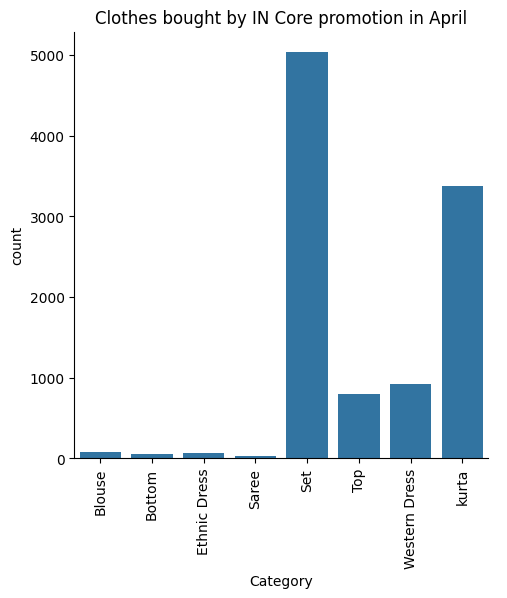

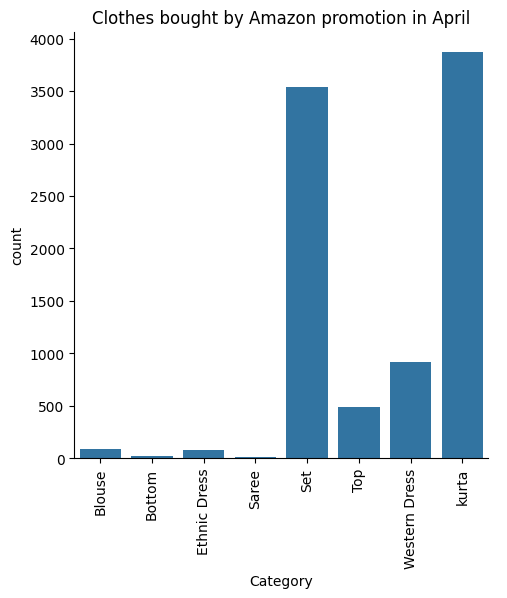

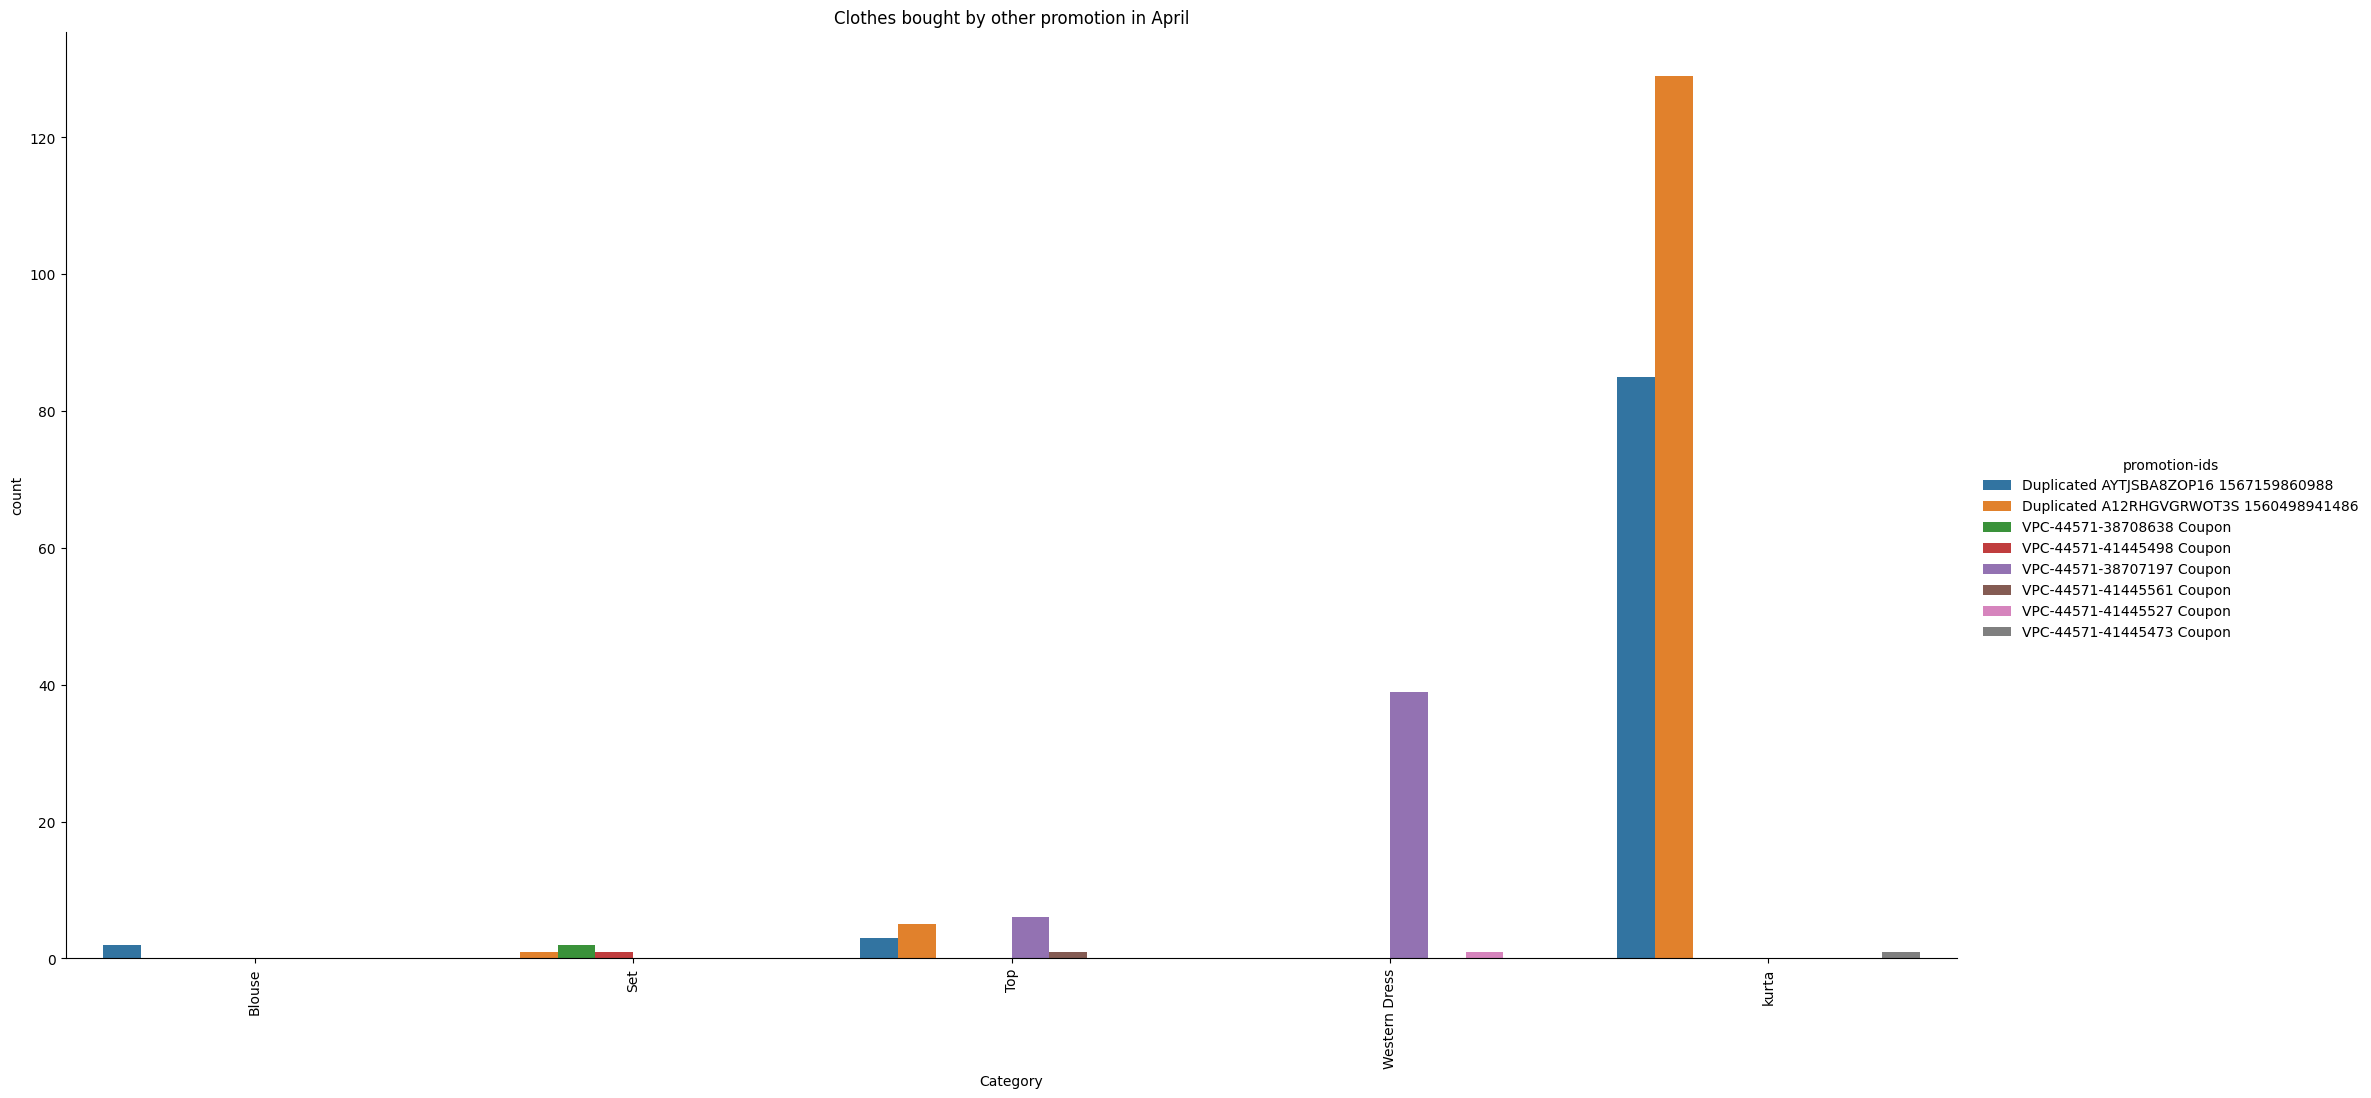

count
Category      promotion-ids                           months       
Blouse        Duplicated AYTJSBA8ZOP16 1567159860988  April       2
Set           Duplicated A12RHGVGRWOT3S 1560498941486 April       1
              VPC-44571-38708638 Coupon               April       2
              VPC-44571-41445498 Coupon               April       1
Top           Duplicated A12RHGVGRWOT3S 1560498941486 April       5
              Duplicated AYTJSBA8ZOP16 1567159860988  April       3
              VPC-44571-38707197 Coupon               April       6
              VPC-44571-41445561 Coupon               April       1
Western Dress VPC-44571-38707197 Coupon               April      39
              VPC-44571-41445527 Coupon               April       1
kurta         Duplicated A12RHGVGRWOT3S 1560498941486 April     129
              Duplicated AYTJSBA8ZOP16 1567159860988  April      85
              VPC-44571-41445473 Coupon               April       1

In [95]:
mask=vestiti_promo_2['promotion-ids'].str.contains('IN Core')
in_core=vestiti_promo_2[['promotion-ids','count','Category','months']][mask==True]
coupon=vestiti_promo_2[['promotion-ids','count','Category','months']][mask==False]
coupon=coupon[['promotion-ids','count','Category','months']][coupon['promotion-ids'].str.contains('Amazon')==False]

incore=in_core.groupby(['Category','months'])[['count','promotion-ids']].sum()

coupon=coupon.groupby(['Category','promotion-ids','months'])[['count']].sum()

amazon=vestiti_promo_2['promotion-ids'].str.contains('Amazon')
amazon_1=vestiti_promo_2[['promotion-ids','count','Category','months']][amazon==True]
amazon_2=amazon_1.groupby(['Category','months'])[['count','promotion-ids']].sum()





sns.catplot(incore,kind='bar',x='Category',y='count')
plt.xticks(rotation=90)
plt.title('Clothes bought by IN Core promotion in April')
plt.show()
sns.catplot(amazon_2,kind='bar',x='Category',y='count')
plt.title('Clothes bought by Amazon promotion in April')
plt.xticks(rotation=90)
plt.show()
sns.catplot(coupon,kind='bar',x='Category',y='count',hue='promotion-ids',aspect=2,height=10)
plt.xticks(rotation=90)
plt.title('Clothes bought by other promotion in April')
plt.show()

coupon



In aprile notiamo che le promozioni più usate per comprare (Western Dress) sono le promozioni duplicated. La promozione VCP invece è stata usata moderatamente per i western dress (spedizione gratuita) ma poco per quanto riguarda gli altri articoli come anche duplicated.
Quella di Amazon di più su kurta e set e lo stesso la promozioni IN CORE.


Perchè abbiamo quegli articoli venduti a 0.0?

In [96]:
print(df['Amount'][df['Amount']==0.0].value_counts())
articoli=df.groupby('Amount')[['months','year','Order ID','Status','promotion-ids','Courier Status']].value_counts().reset_index()
nulli=articoli[['Amount','months','year','Status','Order ID','promotion-ids','Courier Status']][articoli['Amount']==0.0]
count_ordini=nulli['months'].value_counts()
print(count_ordini)
lista_guadagno=[]
for months in ['April','May','June']:
    guadagno=df[['Amount','months']][df['months']==months]['Amount'].sum()
    income=[months,guadagno]
    lista_guadagno.append(income)


df_guadagni=pd.DataFrame(lista_guadagno)
df_guadagni

print(nulli['promotion-ids'].value_counts().reset_index()[nulli['promotion-ids'].value_counts().reset_index()['promotion-ids'].str.contains('VPC')]['count'].sum())

nulli['Order ID'].duplicated().value_counts() # non ci sono ordini gratis fatti dallo stesso cliente
stato=nulli['Status'].value_counts()
stato/stato.sum()*100
stato.sum()

nulli['Courier Status'].value_counts()

df['Amount'][df['Amount']==0.0]


Amount
0.0    532
Name: count, dtype: int64
months
April    227
Name: count, dtype: int64
0


212      0.0
374      0.0
385      0.0
388      0.0
392      0.0
        ... 
30527    0.0
30546    0.0
30722    0.0
30729    0.0
30786    0.0
Name: Amount, Length: 532, dtype: float64

Notiamo che nessuno di questi ordini senza pagamento è stato cancellato e che non ci sono ordini gratis dallo stesso cliente. Questi ordini gratis si sono avuti nel numero massimo ad Aprile mentre moderatamente a Giugno e poco meno a Maggio.
Potrebbero anche essere valori anomali.Comunque ad Aprile si è guadagnato di più mentre a Maggio moderatamente e a Giugno ancora meno. Questi potrebbero essere il motivo di questo calo di fatturato tra Aprile e Giugno?
Notiamo che la maggior parte di questi ordini è stato consegnato al cliente (87%) mentre 50 sono stati resi (6%), 5 sospesi (0.64%), 2 persi nel transito (0.25%) e 2 sono in fase di reso (in totale 57 di questi ordini sono nulli per questo motivo). Nessuno di loro si tratta di ordini cancellati ma 13 sono non spediti
Invece la maggior parte ha utilizzato la promozione Amazon (779) mentre soltanto 2 VCP coupon.
- 57 ordini nulli per reso,sospeso,perso nel transito e in fase di reso su 781 + 13 non spediti (in tutto 8,96%)
- 779 comprati con la promozione Amazon (non sappiamo cosa comporti) su 781 99,74%
- La maggior parte di loro si è avuta nel mese di Aprile
- Potrebbe anche essere un errore, in quanto abbiamo 7795 valori nulli su 128975 incassi 6,54%
- Sono 781 ordini nulli su 128975 ordini in totale (0,61%)


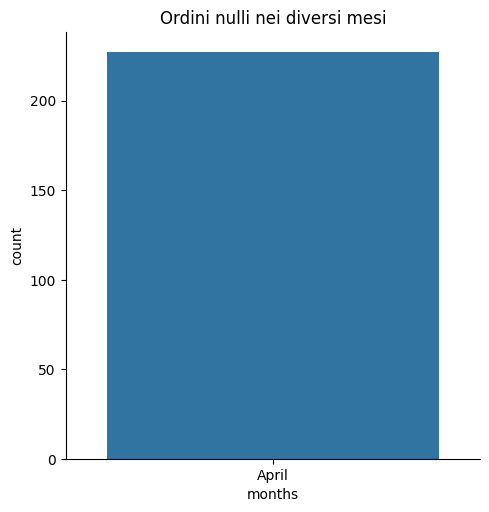

In [97]:


sns.catplot(data=count_ordini,kind='bar')
plt.title('Ordini nulli nei diversi mesi')
plt.show()





Valori anomali e nulli sulla colonna Amount?

In [98]:
df['Amount'].describe()
new_df=df.copy()
#new_df['Amount']=new_df['Amount'][new_df['Amount']!=0.0]
new_df['Amount']

0         647.62
1         406.00
2         329.00
3         753.33
4         574.00
          ...   
30861     759.00
30862    1065.00
30863     696.00
30864    1140.00
30865        NaN
Name: Amount, Length: 30866, dtype: float64

In [99]:
df['Amount'][df['Amount'].isnull()==True]
new_df['Amount'].fillna(new_df['Amount'].median())
new_df['Amount'].describe()

count    28965.000000
mean       620.804767
std        270.348688
min          0.000000
25%        432.000000
50%        568.000000
75%        759.000000
max       5495.000000
Name: Amount, dtype: float64

In [100]:
#metodo percentili
sup=df['Amount'].quantile(0.99)
inf=df['Amount'].quantile(0.01)
out=df['Amount'].loc[(df['Amount']>sup)&(df['Amount']<inf)]
out

Series([], Name: Amount, dtype: float64)

In [101]:
#metodo zscore
superiore=df['Amount']+3*df['Amount'].std()
inferiore=df['Amount']-3*df['Amount'].std()
outliers=df['Amount'].loc[(df['Amount']>superiore)&(df['Amount']<inferiore)]
print(outliers)

Series([], Name: Amount, dtype: float64)


In [102]:
index=np.where(new_df['Amount']==0.0)[0]
new_df['free_order']=new_df['Amount'].iloc[index]
new_df['free_order']=new_df['free_order'].fillna('Order not null')
new_df['free_order']=new_df['free_order'].apply(lambda f:f if f!=0.0 else 'Order null')
count=new_df['free_order'].iloc[index].value_counts().sum()

new_df['Amount']=new_df['Amount'][new_df['Amount']!=0.0]
print(new_df['free_order'],count,len(df['Amount']),len(new_df['Amount']))

0        Order not null
1        Order not null
2        Order not null
3        Order not null
4        Order not null
              ...      
30861    Order not null
30862    Order not null
30863    Order not null
30864    Order not null
30865    Order not null
Name: free_order, Length: 30866, dtype: object 532 30866 30866


Category
Set              651
Western Dress      8
kurta              2
Name: count, dtype: int64
Valori tolti al di sopra del limite superiore [   80   102   146   243   251   265   299   318   324   349   398   416
   519   541   566   647   734   753   803   815   900   902   955  1013
  1018  1148  1241  1243  1312  1317  1458  1470  1491  1549  1581  1589
  1647  1696  1779  1801  1802  1811  1812  1815  1851  1917  1932  2214
  2324  2470  2521  2524  2533  2601  2765  2768  2796  2912  2920  2945
  3019  3021  3026  3048  3106  3120  3128  3139  3215  3289  3298  3424
  3482  3516  3633  3642  3664  3839  3843  3857  3873  3875  3904  3907
  3913  3960  4099  4140  4188  4223  4224  4249  4259  4268  4288  4316
  4355  4429  4450  4467  4552  4559  4618  4784  4796  4901  4902  4906
  4912  5028  5032  5209  5237  5241  5246  5343  5356  5404  5414  5417
  5456  5534  5541  5604  5642  5671  5680  5830  5873  5876  5911  5952
  6008  6044  6056  6067  6102  6169  6193  6215  633

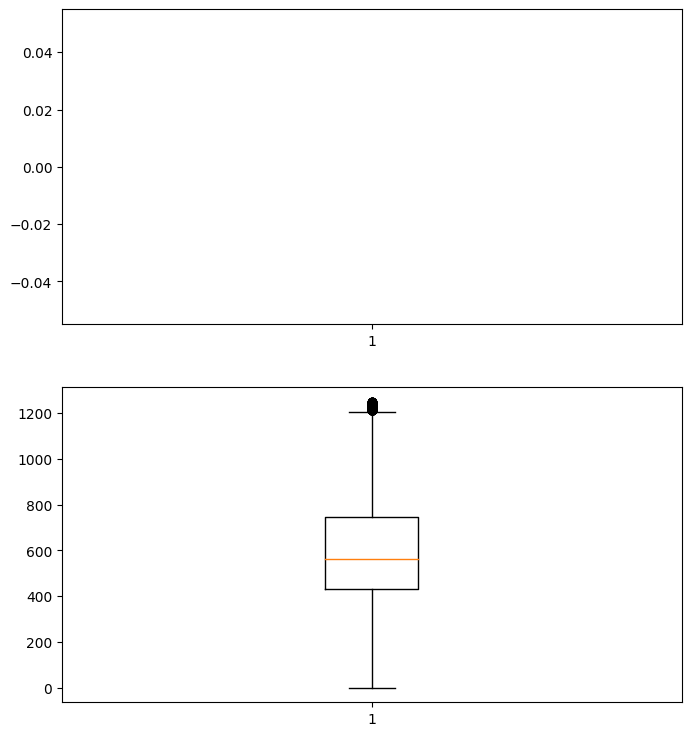

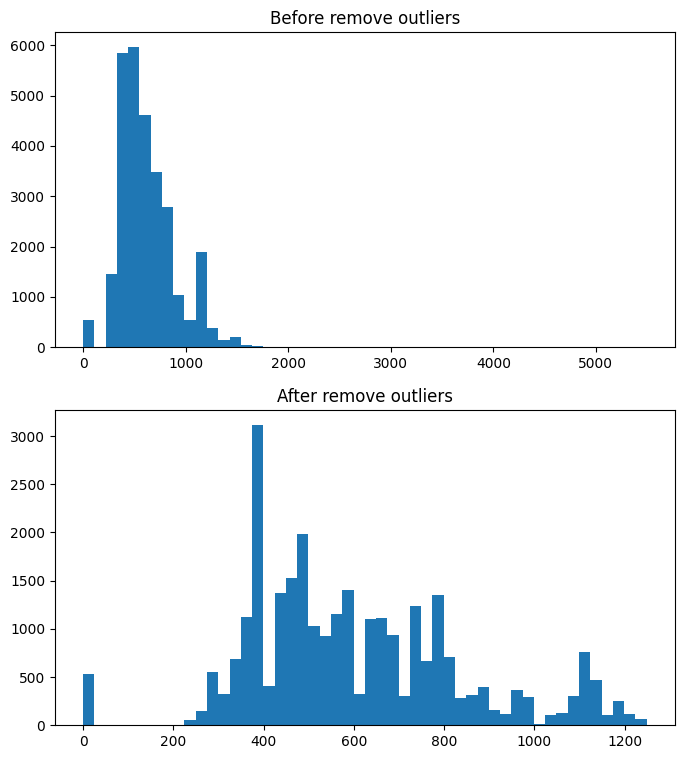

Before count    28965.000000
mean       620.804767
std        270.348688
min          0.000000
25%        432.000000
50%        568.000000
75%        759.000000
max       5495.000000
Name: Amount, dtype: float64
After count    28304.000000
mean       602.105631
std        240.843613
min          0.000000
25%        432.000000
50%        563.000000
75%        744.000000
max       1249.110000
Name: Amount, dtype: float64
Asimmetria (1.137335370368583, 0.5204405501686098) Curtosi (5.9727148751622146, 0.22414231678093177)


In [103]:
#metodo interquartile
q1=df['Amount'].quantile(0.25)
q3=df['Amount'].quantile(0.75)
irq=q3-q1
upper=q3+(1.5*irq)
lower=q1-(1.5*irq)
#new_df=df.loc[(df['Amount']<upper)&(df['Amount']>lower)]
indice=np.array(df['Amount'][(df['Amount']>upper)&(df['Amount']>lower)].reset_index()['index'])
num=len(indice)
out=df['Category'].iloc[indice].value_counts()
print(out)
new_df=df.loc[(df['Amount']<upper)&(df['Amount']>lower)]
print('Valori tolti al di sopra del limite superiore',indice)
print('Numero valori anomali',num,'Lunghezza nuova colonna',len(df['Amount'])-len(new_df['Amount']))


fig,ax=plt.subplots(2,1,figsize=(8,9))
ax[1].boxplot(new_df['Amount'])
ax[0].boxplot(df['Amount'])
plt.plot()


fig,ax=plt.subplots(2,1,figsize=(8,9))
ax[1].hist(new_df['Amount'],bins=50)
ax[1].set_title('After remove outliers')
ax[0].hist(df['Amount'],bins=50)
ax[0].set_title('Before remove outliers')
plt.show()
print('Before',df['Amount'].describe())
print('After',new_df['Amount'].describe())
print('Asimmetria',(df['Amount'].skew(),new_df['Amount'].skew()),'Curtosi',(df['Amount'].kurt(),new_df['Amount'].kurt()))

In [104]:
guadagno=new_df.groupby('months')['Amount'].sum().reset_index()
guadagno_prima=df.groupby('months')['Amount'].sum().reset_index()
print(guadagno)
print(guadagno_prima)
somma2=new_df['Amount'].sum()
somma1=df['Amount'].sum()
print(somma1,somma2)

  months       Amount
0  April  17041997.77
  months       Amount
0  April  17981610.07
17981610.07 17041997.770000003


- I valori anomali abbassano il guadagno mentre gli ordini gratis non hanno un uguale impatto, anzi lasciano il guadagno invariato (vedremo poi la correlazione).

- Il numero dei valori anomali identificati dall'intervallo interquartile è 3600 su 117580 (3,06%).
Dall'istogramma si nota chiaramente che con i valori anomali l'intervallo dei dati era compreso tra 0 e 16000 (i valori erano maggiormente compresi prima di 1000 e calavano dopo 1000 fino a scomparire prima di 2000 (max 5584)) mentre senza è un intervallo più piccolo tra 0 e 5000 (maggiormente compresi tra da metà 200 a 800 per poi calare fino a 1200 (max 1299)).
La distribuzione in entrambi casi è poco asimmetrica ma nel primo caso la curtosi, quindi la concentrazione dei dati intorno alla media era maggiore mentre nel secondo caso questa togliendo i valori anomali è stata ridotta molto.
I dati sembrano distribuiti più ampiamente.


- Si è venduto di meno a marzo, picco basso in assoluto, e giugno quindi ai cambiamenti di stagione.

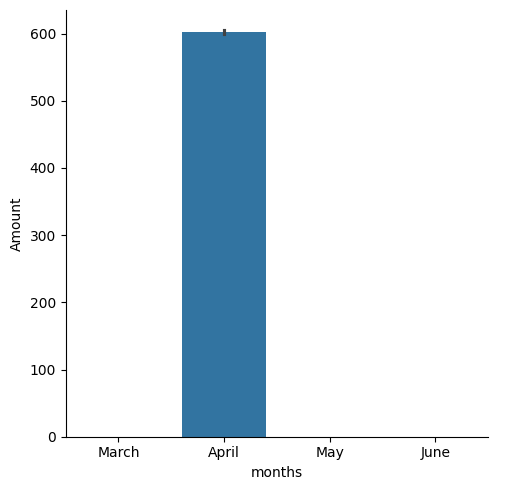

In [105]:
new_df['Amount']
xticks=['March','April','May','June']
sns.catplot(data=new_df,x='months',y='Amount',order=xticks,kind='bar')
plt.show()

In [106]:
new_df['free_order']=pd.factorize(new_df['free_order'])[0]
print(np.where(new_df['free_order']==1)[0])

KeyError: 'free_order'

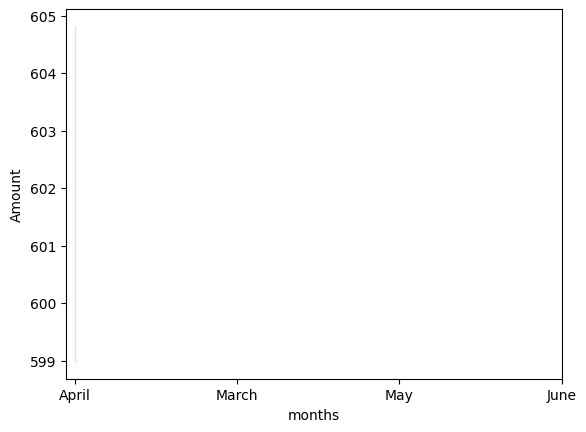

In [110]:
mes=['March','April','May','June']
sns.lineplot(data=new_df,x='months',y='Amount')
plt.xticks(mes)
plt.show()

Shop da cui i clienti acquistano

In [109]:

channel=new_df[['Fulfilment','fulfilled-by','Sales Channel ','ship-service-level']].apply(lambda x:x.value_counts()).fillna(0).astype(int)
perc_channel=channel/channel.sum()*100
perc_channel.round(1)


,Fulfilment,fulfilled-by,Sales Channel,ship-service-level
Amazon,63.9,0.0,0.0,0.0
Amazon.in,0.0,0.0,100.0,0.0
Easy Ship,0.0,100.0,0.0,0.0
Expedited,0.0,0.0,0.0,63.2
Merchant,36.1,0.0,0.0,0.0
Standard,0.0,0.0,0.0,36.8


In [108]:
new_df[['ship-service-level','fulfilled-by']][(new_df['ship-service-level']=='Standard')|(new_df['fulfilled-by'].isin(['Easy Ship','Merchant']))].value_counts()

ship-service-level  fulfilled-by
Standard            Easy Ship       10206
Name: count, dtype: int64

- I clienti hanno comprato su Amazon (117580) e la maggior parte ha beneficiato della spedizione espressa (68%,80167) rispetto a quella standard (31%,915).

- I fornitori principali sono: al primo posto Amazon seguito da Merchant e Easy Ship (in ugual numero) (69% per Amazon e 31% per gli altri due).

- Il tipo di spedizione dipende anche dal tipo di fornitore.
La spedizione standard invece è stata utlizzata di più su Merchant che su Amazon (Merchant è uno strumento per far comparire la propria merce sulla barra di ricerca google da cui i clienti possono acquistare più facilmente e che promuove
la merce).
Lo stesso numero di persone ha utilizzato quella standard su Easy Ship.
Quindi Amazon ha il primato sulla spedizione espressa.


Provenienza clienti

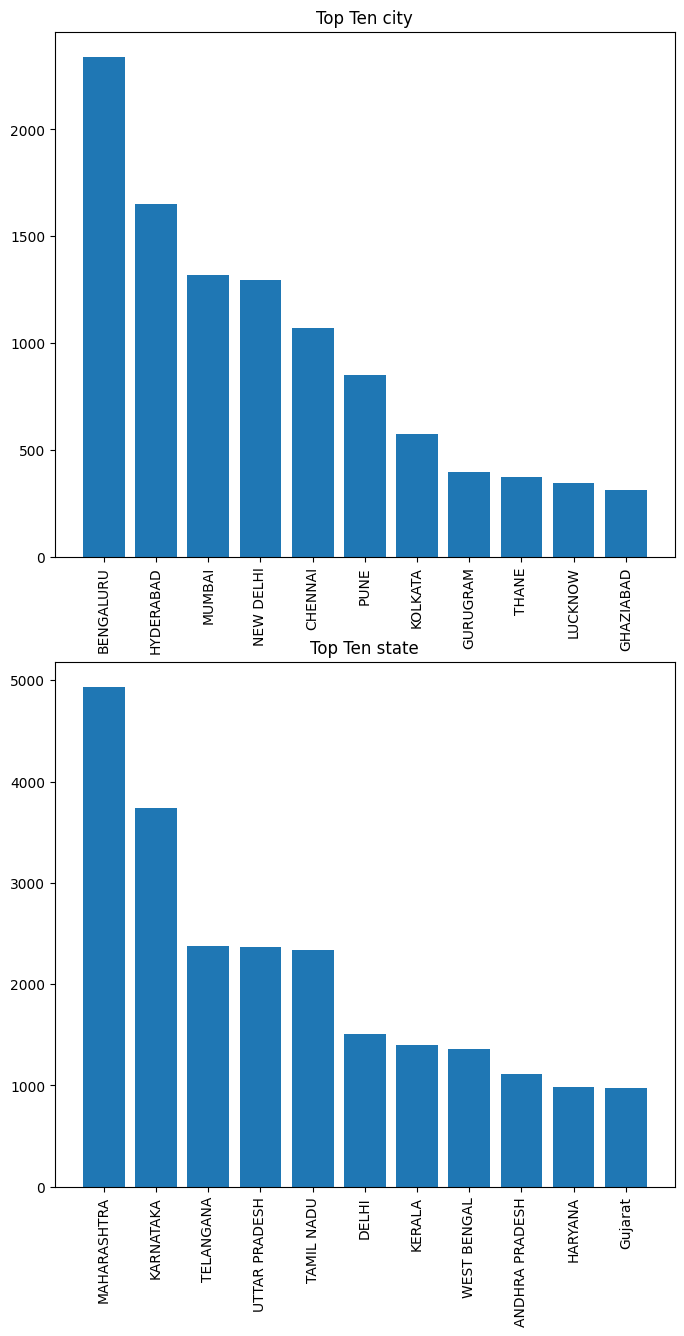

In [115]:

provenienza=new_df['ship-city'].value_counts().reset_index()
stato=new_df['ship-state'].value_counts().reset_index()
stato_max=stato.iloc[stato['count'].nlargest(11).index].reset_index()
provenienza_max=provenienza.apply(lambda max:max.sort_values(ascending=True))
primi_dieci=provenienza_max.iloc[0:11]
fig,ax=plt.subplots(2,1,figsize=(8,15))
ax[0].bar(primi_dieci['ship-city'],primi_dieci['count'])
ax[0].tick_params(axis='x',labelrotation=90)
ax[0].set_title('Top Ten city')
ax[1].bar(stato_max['ship-state'],stato_max['count'])
ax[1].set_title('Top Ten state')
ax[1].tick_params(axis='x',labelrotation=90)
plt.show()


- Il più alto numero di clienti proviene

In [ ]:
new_df['ship-country'].value_counts()

Quantità di vestiti acquistata e frequenza di acquisto